### Big Mart

    The aim is to build a predictive model and fing the sales figures of each product at a particulr store
    
**Importing Librairies**

In [1]:
# importing the required librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Load train and test dataset in pandas dataframe
train = pd.read_csv('archive/bigmart/train.csv')
test  = pd.read_csv('archive/bigmart/test.csv')

In [3]:
# train head subset
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# test head subset
test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# train shape, number of lines and columns
train.shape

(8523, 12)

In [6]:
# test shape, number of lines and columns
test.shape

(5681, 11)

In [7]:
# Print the name of columns in test dataset
test.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [8]:
# print the name of columns in train dataset
train.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [9]:
# combine test and train into one dataset
train['source'] = 'train'
test['source'] = 'test'
data  = pd.concat([train, test], ignore_index=True)
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [10]:
# Size of dataset
data.shape

(14204, 13)

In [11]:
# Describe dataset
data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# Check the null values
data.isnull().sum().sort_values(ascending=False)

OutletSales          5681
OutletSize           4016
Weight               2439
ProductID               0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
LocationType            0
OutletType              0
source                  0
dtype: int64

In [13]:
# Print the unique values in Fat Content, where they are only two type of fat: Regular or Low
data['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
# Print the unique value in the Established year
data['EstablishmentYear'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [15]:
# Calculate the Outlet Age
data['OutletAge'] = 2018 - data['EstablishmentYear']
data.head(2)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source,OutletAge
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [16]:
# Print unique values in OutletSize
data['OutletSize'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
# Print the count value of Fat content columns
data['FatContent'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: FatContent, dtype: int64

We can see that **low fat** is the most adundant

In [18]:
# Print the count value of OutletSize
data['OutletSize'].value_counts()

Medium    4655
Small     3980
High      1553
Name: OutletSize, dtype: int64

We can see here that **Medium** is major outlet size and **Small** 

In [19]:
# Use the function to find the most common value in the Outlet Size
data['OutletSize'].mode()[0]

'Medium'

The output show that **Medium** is the most occuring value

In [20]:
# Replacing the missing in Outlet Size by 'Medium'
data['OutletSize'].fillna(data['OutletSize'].mode()[0], inplace=True)

In [21]:
# Replacing the missing value in Weight column by the mean
data['Weight'].fillna(data['Weight'].mean(), inplace=True)

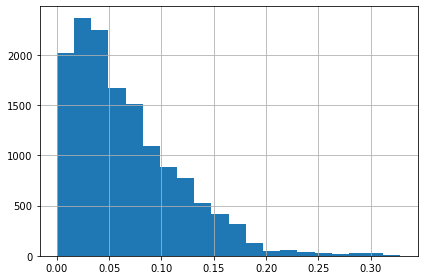

In [22]:
# Plot histogram to see the visibility of Prouct item
data['ProductVisibility'].hist(bins=20); plt.tight_layout()

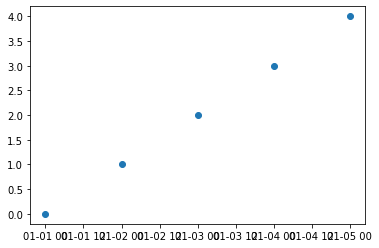

In [23]:
plt.plot_date(x=pd.date_range('2000', periods=5), y=range(5))# y=pd.date_range(1900, periods=5))#, xdate=True, ydate=True)

In [24]:
data.ProductVisibility.skew()

1.1951751774587882

In [25]:
# Detecting Outlier in Product visibility column
# calculate the first quantile:
Q1 = data['ProductVisibility'].quantile(0.25)
Q1

0.027035682499999998

In [26]:
# Calculate the second quantile:
Q3 = data['ProductVisibility'].quantile(0.75)
Q3

0.0940372535

In [27]:
# Calculate interquatile range IQR
IQR = Q3 - Q1
IQR

0.06700157100000001

In [28]:
# Now the interquatile is now, remove the outliers in the data
# The result is stored in the fill_data variable
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= ProductVisibility <= (@Q3 + 1.5 * @IQR)')

In [29]:
# display data
fill_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source,OutletAge
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,31


In [30]:
# Check the shape of resulting dataset without outlier
fill_data.shape

(13943, 14)

In [31]:
# Check the shape of original dataset with outliers
data.shape

(14204, 14)

In [32]:
Q1 - 1.5 * IQR

-0.07346667400000001

In [33]:
Q3 - 1.5 * IQR

-0.006465103000000014

In [34]:
data['ProductVisibility'].max()

0.328390948

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='ProductVisibility'>

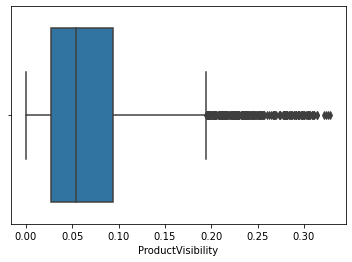

In [36]:
# Visualize the outlier in the original data
sns.boxplot(x=data['ProductVisibility'])

<AxesSubplot:xlabel='ProductVisibility'>

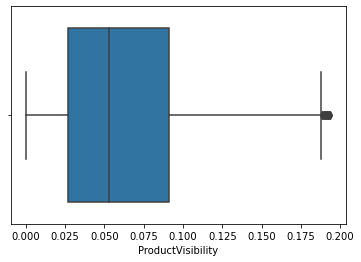

In [37]:
# Plot the new data
sns.boxplot(x=fill_data['ProductVisibility'])

In [38]:
# Removing outlier in original data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fill_data = data.query('@lower_bound <= ProductVisibility <= @upper_bound')
fill_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source,OutletAge
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,31


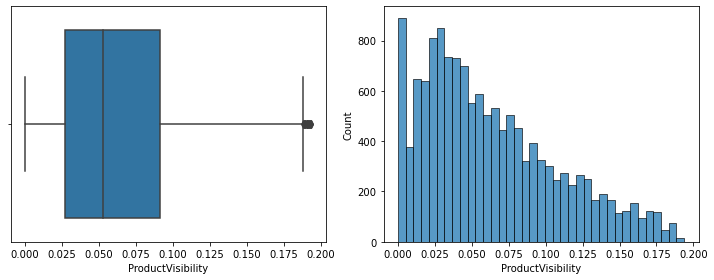

In [39]:
# Visualize the data without outlier
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(x='ProductVisibility', data=fill_data, ax=axes[0])
sns.histplot(x='ProductVisibility', data=fill_data, ax=axes[1])
plt.tight_layout()

In [40]:
# Assign fill_data to data dataframe
data = fill_data

In [41]:
data.shape

(13943, 14)

In [42]:
# Transform ProductVisibility by converting the numerical values in categories of FatProduct variable
data['ProductVisibility_bins'] = pd.cut(data['ProductVisibility'], bins=[0.000, 0.065, 0.13, 0.2], 
                                       labels = ['Low Viz', 'Viz', 'High Viz'])

In [43]:
# Print the count of ProductVisibility_bins 
data['ProductVisibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: ProductVisibility_bins, dtype: int64

In [44]:
# Replace null value with Low Visibility
data['ProductVisibility_bins'].fillna('Low Viz', inplace=True)

In [45]:
# Replace all represent of low fat with Low Fat in FatContent variable
data['FatContent'].value_counts()

Low Fat    8352
Regular    4721
LF          506
reg         190
low fat     174
Name: FatContent, dtype: int64

In [46]:
data['FatContent'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)

In [47]:
# Replace all represent of Regular Fat by Regular in FatContent variable
data.FatContent.replace(['reg'], 'Regular', inplace=True)

In [48]:
# Print the unique fat count values
data['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [49]:
# Code all categorical variable has number using 'LabelEncoder' from sklearn preprocessing module
# Intialize the label encode
le = LabelEncoder()

In [50]:
# Transform FatContent
data.loc[:, 'FatContent'] = le.fit_transform(data['FatContent'])

In [51]:
# Display the actual head of FatContent variable
data['FatContent'].head()

0    0
1    1
2    0
3    1
4    0
Name: FatContent, dtype: int64

In [52]:
# Transform the ProductVisibilityBins
data['ProductVisibility_bins'] = le.fit_transform(data['ProductVisibility_bins'])

In [53]:
# Print the head of actual ProductVisibility_bins variable
data['ProductVisibility_bins'].head()

0    1
1    1
2    1
3    1
4    1
Name: ProductVisibility_bins, dtype: int64

In [54]:
# Transform the OutletSize
data['OutletSize'] = le.fit_transform(data['OutletSize'])

In [55]:
# Print the OutletSize variable
data['OutletSize'].head()

0    1
1    1
2    1
3    1
4    0
Name: OutletSize, dtype: int64

In [56]:
# Transform LocationType variable
data.loc[:, 'LocationType'] = le.fit_transform(data['LocationType'])

In [57]:
# Print the LocationType variable
data.LocationType.head()

0    0
1    2
2    0
3    2
4    2
Name: LocationType, dtype: int64

In [58]:
# Print the unique value of OutleType variable
data['OutletType'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [59]:
# Create dummies for OutletType variable
dummies = pd.get_dummies(data['OutletType'])

In [60]:
# Print dummies
dummies.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [61]:
# Explore Product Identifier
data['ProductID']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: ProductID, Length: 13943, dtype: object

In [62]:
# Count the number of Food values
data['ProductID'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: ProductID, Length: 1559, dtype: int64

In [63]:
# As multiple categories are present int ProductID, reduce this by mapping
data['ProductID_combined'] = data['ProductID'].apply(lambda x: x[0:2])

In [64]:
data['ProductID_combined'].value_counts()

FD    9991
NC    2652
DR    1300
Name: ProductID_combined, dtype: int64

In [65]:
data['ProductID_combined'] = data['ProductID_combined'].replace({
                                                "FD": 'Food',
                                                'NC':'Non-consomable',
                                                'DR':'Drinks'
                                                })

In [66]:
# We have now only three categories of product in ProductID
data['ProductID_combined'].value_counts()

Food              9991
Non-consomable    2652
Drinks            1300
Name: ProductID_combined, dtype: int64

In [67]:
data.shape

(13943, 16)

In [68]:
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source,OutletAge,ProductVisibility_bins,ProductID_combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,19,1,Food
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,9,1,Drinks
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,19,1,Food
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,20,1,Food
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,31,1,Non-consomable


In [69]:
# Perform one hot for all columns has the model works on numerical value not on the categorical values
data = pd.get_dummies(data, columns=['FatContent', 'OutletSize', 'LocationType', 'OutletType', 'ProductID_combined'])

In [70]:
data.dtypes

ProductID                             object
Weight                               float64
ProductVisibility                    float64
ProductType                           object
MRP                                  float64
OutletID                              object
EstablishmentYear                      int64
OutletSales                          float64
source                                object
OutletAge                              int64
ProductVisibility_bins                 int64
FatContent_0                           uint8
FatContent_1                           uint8
OutletSize_0                           uint8
OutletSize_1                           uint8
OutletSize_2                           uint8
LocationType_0                         uint8
LocationType_1                         uint8
LocationType_2                         uint8
OutletType_Grocery Store               uint8
OutletType_Supermarket Type1           uint8
OutletType_Supermarket Type2           uint8
OutletType

In [71]:
# Drop columns which has been converted to different type
data.drop(columns=['EstablishmentYear'], inplace=True)

In [72]:
data.dtypes

ProductID                             object
Weight                               float64
ProductVisibility                    float64
ProductType                           object
MRP                                  float64
OutletID                              object
OutletSales                          float64
source                                object
OutletAge                              int64
ProductVisibility_bins                 int64
FatContent_0                           uint8
FatContent_1                           uint8
OutletSize_0                           uint8
OutletSize_1                           uint8
OutletSize_2                           uint8
LocationType_0                         uint8
LocationType_1                         uint8
LocationType_2                         uint8
OutletType_Grocery Store               uint8
OutletType_Supermarket Type1           uint8
OutletType_Supermarket Type2           uint8
OutletType_Supermarket Type3           uint8
ProductID_

In [73]:
# Divided the dataset created earlier into train and test datasets
train = data.loc[data['source'] == 'train', :]
test  = data.loc[data['source'] == 'test', :]

In [74]:
train.head()

,ProductID,Weight,ProductVisibility,ProductType,MRP,OutletID,OutletSales,source,OutletAge,ProductVisibility_bins,...,LocationType_0,LocationType_1,LocationType_2,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,ProductID_combined_Drinks,ProductID_combined_Food,ProductID_combined_Non-consomable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,3735.1380,train,19,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,443.4228,train,9,1,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,2097.2700,train,19,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,732.3800,train,20,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,994.7052,train,31,1,...,0,0,1,0,1,0,0,0,0,1


In [75]:
test.head()

,ProductID,Weight,ProductVisibility,ProductType,MRP,OutletID,OutletSales,source,OutletAge,ProductVisibility_bins,...,LocationType_0,LocationType_1,LocationType_2,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,ProductID_combined_Drinks,ProductID_combined_Food,ProductID_combined_Non-consomable
8523,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,NaN,test,19,1,...,1,0,0,0,1,0,0,0,1,0
8524,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,NaN,test,11,1,...,0,1,0,0,1,0,0,0,1,0
8525,NCN55,14.600000,0.099575,Others,241.7538,OUT010,NaN,test,20,2,...,0,0,1,1,0,0,0,0,0,1
8526,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,NaN,test,11,1,...,0,1,0,0,1,0,0,0,1,0
8527,FDY38,12.792854,0.118599,Dairy,234.2300,OUT027,NaN,test,33,2,...,0,0,1,0,0,0,1,0,1,0


In [76]:
# Drop the unnecessary columns
test.drop(columns=['source', 'OutletSales'], inplace=True)
train.drop(columns=['source'], inplace=True)

/tmp/ipykernel_6826/2216158940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['source', 'OutletSales'], inplace=True)
/tmp/ipykernel_6826/2216158940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['source'], inplace=True)


In [77]:
# Export modified versions of files
train.to_csv('archive/bigmart/train_modified.csv', index=False)
test.to_csv('archive/bigmart/test_modified.csv', index=False)

In [78]:
!ls archive/bigmart

test.csv  test_modified.csv  train.csv	train_modified.csv


In [79]:
# Use now the train_modified.csv and test_modified.csv file
train2 = pd.read_csv('archive/bigmart/train_modified.csv')
test2  = pd.read_csv('archive/bigmart/test_modified.csv')

In [80]:
# Print the data types of train2 columns
train2.dtypes

ProductID                             object
Weight                               float64
ProductVisibility                    float64
ProductType                           object
MRP                                  float64
OutletID                              object
OutletSales                          float64
OutletAge                              int64
ProductVisibility_bins                 int64
FatContent_0                           int64
FatContent_1                           int64
OutletSize_0                           int64
OutletSize_1                           int64
OutletSize_2                           int64
LocationType_0                         int64
LocationType_1                         int64
LocationType_2                         int64
OutletType_Grocery Store               int64
OutletType_Supermarket Type1           int64
OutletType_Supermarket Type2           int64
OutletType_Supermarket Type3           int64
ProductID_combined_Drinks              int64
ProductID_

In [81]:
# Create the independent variable x_train and dependent variable y_train in from the train dataset
X_train = train2.drop(columns=['ProductType', 'OutletSales', 'ProductID', 'OutletID'])
y_train = train2.OutletSales

In [82]:
# Print data types in X_train datasets
X_train.dtypes

Weight                               float64
ProductVisibility                    float64
MRP                                  float64
OutletAge                              int64
ProductVisibility_bins                 int64
FatContent_0                           int64
FatContent_1                           int64
OutletSize_0                           int64
OutletSize_1                           int64
OutletSize_2                           int64
LocationType_0                         int64
LocationType_1                         int64
LocationType_2                         int64
OutletType_Grocery Store               int64
OutletType_Supermarket Type1           int64
OutletType_Supermarket Type2           int64
OutletType_Supermarket Type3           int64
ProductID_combined_Drinks              int64
ProductID_combined_Food                int64
ProductID_combined_Non-consomable      int64
dtype: object

In [83]:
# Drop irrelevant variable in test2 dataset 
test2.drop(['ProductType', 'ProductID', 'OutletID'], axis=1, inplace=True)
test2.head()

,Weight,ProductVisibility,MRP,OutletAge,ProductVisibility_bins,FatContent_0,FatContent_1,OutletSize_0,OutletSize_1,OutletSize_2,LocationType_0,LocationType_1,LocationType_2,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,ProductID_combined_Drinks,ProductID_combined_Food,ProductID_combined_Non-consomable
0,20.750000,0.007565,107.8622,19,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [84]:
X_train.head(2)

,Weight,ProductVisibility,MRP,OutletAge,ProductVisibility_bins,FatContent_0,FatContent_1,OutletSize_0,OutletSize_1,OutletSize_2,LocationType_0,LocationType_1,LocationType_2,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,ProductID_combined_Drinks,ProductID_combined_Food,ProductID_combined_Non-consomable
0,9.30,0.016047,249.8092,19,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0


In [85]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: OutletSales, dtype: float64

In [86]:
test2.head(2)

,Weight,ProductVisibility,MRP,OutletAge,ProductVisibility_bins,FatContent_0,FatContent_1,OutletSize_0,OutletSize_1,OutletSize_2,LocationType_0,LocationType_1,LocationType_2,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,ProductID_combined_Drinks,ProductID_combined_Food,ProductID_combined_Non-consomable
0,20.75,0.007565,107.8622,19,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,8.30,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [87]:
# Import sklearn librairies for model selection and linear algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
# Create train and test split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [89]:
# Fit linear Regression to the train dataset
lin = LinearRegression()

In [90]:
lin.fit(x_train, y_train)

LinearRegression()

In [91]:
# Print the coeficients and intercept of line
print(lin.coef_, end='\n\n intercept: ')
print(lin.intercept_)

[-1.92692654e+00 -3.32746294e+02  1.58826212e+01 -3.19549640e+01
 -1.41755050e+01 -1.45901761e+00  1.45901761e+00  5.39642616e+02
 -3.11411308e+02 -2.28231308e+02  1.88878689e+02  4.79867957e+01
 -2.36865485e+02 -1.63576909e+03 -1.25872012e+02 -3.48803423e+02
  2.11044453e+03  8.83932211e+00  3.46875666e+01 -4.35268887e+01]

 intercept: 955.4681471908866


In [92]:
# Predict the test set results of training data
predictions = lin.predict(x_test)
predictions

array([2070.25767998, 3705.69772   , 2962.46996681, ..., 3533.89305865,
       3477.22169198, 1241.7263815 ])

In [93]:
# Find the RMSE for the model
import math

In [94]:
print(math.sqrt(mean_squared_error(y_test, predictions)))

1126.4071066411782


In [95]:
# Predict the OutletSales of test dataset
y_sales_pred = lin.predict(test2)
y_sales_pred

array([1789.6058103 , 1594.72524585, 1837.40378278, ..., 1823.78563072,
       3615.91286916, 1276.90636874])

In [96]:
test_predictions = pd.DataFrame({
    'ProductID':test['ProductID'],
    'OutletID' : test['OutletID'],
    'OutletSales':y_sales_pred
})

In [97]:
test_predictions

,ProductID,OutletID,OutletSales
8523,FDW58,OUT049,1789.605810
8524,FDW14,OUT017,1594.725246
8525,NCN55,OUT010,1837.403783
8526,FDQ58,OUT017,2676.850457
8527,FDY38,OUT027,5126.989630
...,...,...,...
14199,FDB58,OUT046,2360.895690
14200,FDD47,OUT018,2431.178290
14201,NCO17,OUT045,1823.785631
14202,FDJ26,OUT017,3615.912869


In [98]:
r2_score(y_test, predictions)

0.5642247934683804